In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1337)

In [2]:
dataset = "./data/mushrooms-one_hot.csv"

data = pd.read_csv(dataset)  # read DataSet

print("DataSet Size : {}".format(data.shape))
data.head(5)  # top 5 contents

DataSet Size : (8124, 24)


,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,[0. 1.],[0. 0. 0. 0. 0. 1.],[0. 0. 1. 0.],[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 1.],[0. 0. 0. 0. 0. 0. 1. 0. 0.],[0. 1.],[1. 0.],[0. 1.],...,[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 1. 0. 0.],[0. 0. 0. 0. 0. 1. 0.]
1,1,[1. 0.],[0. 0. 0. 0. 0. 1.],[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.],[0. 1.],[1. 0. 0. 0. 0. 0. 0. 0. 0.],[0. 1.],[1. 0.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 0. 1. 0. 0. 0.],[0. 1. 0. 0. 0. 0. 0.]
2,2,[1. 0.],[1. 0. 0. 0. 0. 0.],[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 1.],[0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 1.],[1. 0.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 0. 1. 0. 0. 0.],[0. 0. 0. 1. 0. 0. 0.]
3,3,[0. 1.],[0. 0. 0. 0. 0. 1.],[0. 0. 0. 1.],[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 1.],[0. 0. 0. 0. 0. 0. 1. 0. 0.],[0. 1.],[1. 0.],[0. 1.],...,[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 1. 0. 0.],[0. 0. 0. 0. 0. 1. 0.]
4,4,[1. 0.],[0. 0. 0. 0. 0. 1.],[0. 0. 1. 0.],[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.],[1. 0.],[0. 0. 0. 0. 0. 1. 0. 0. 0.],[0. 1.],[0. 1.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[1. 0. 0. 0. 0.],[0. 0. 0. 1. 0. 0. 0. 0. 0.],[1. 0. 0. 0. 0. 0.],[0. 1. 0. 0. 0. 0. 0.]


In [3]:
p = data.loc[data['class'] == '[0. 1.]']
e = data.loc[data['class'] == '[1. 0.]']

print("poison : {} edible : {}".format(len(p), len(e)))

poison : 3916 edible : 4208


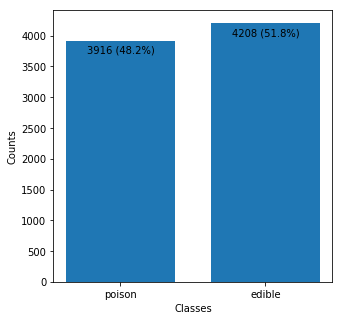

In [4]:
def draw_bar(p, e, name):
    classes = ['poison', 'edible']
    counts = [len(p), len(e)]

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)

    rects = plt.bar(np.arange(2), counts, align='center', width=.75)
    plt.xticks(np.arange(2), classes)

    for i, rect in enumerate(rects):
        ax.text(rect.get_x() + rect.get_width() / 2.0, 0.95 * rect.get_height(), str(counts[i]) + " ({:.1f}%)".format(counts[i] / 8124 * 100), ha='center')

    plt.xlabel(name)
    plt.ylabel('Counts')

draw_bar(p, e, "Classes")

In [5]:
res = data.isin(['?']).any()
res.loc[res == True]

Series([], dtype: bool)

In [6]:
print(len(data.loc[data['stalk-root'] == '?']))
data.drop('stalk-shape', axis=1, inplace=True)  # drop stalk-shape

0


In [7]:
n = 5
top_p = p.sample(n)
top_e = e.sample(n)

In [8]:
top_p

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4487,4487,[0. 1.],[0. 0. 0. 0. 0. 1.],[0. 0. 0. 1.],[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.],[1. 0.],[0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 1.],[1. 0.],[1. 0.],...,[0. 1. 0. 0.],[0. 0. 0. 0. 0. 0. 1. 0. 0.],[0. 0. 0. 0. 0. 0. 1. 0. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 1. 0. 0.],[0. 1. 0. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 1. 0.],[1. 0. 0. 0. 0. 0. 0.]
5575,5575,[0. 1.],[0. 0. 0. 0. 0. 1.],[0. 0. 1. 0.],[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.],[0. 1.],[0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 1.],[1. 0.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 1. 0. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 1. 0.],[0. 1. 0. 0. 0. 0. 0.]
6462,6462,[0. 1.],[0. 0. 1. 0. 0. 0.],[0. 0. 0. 1.],[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.],[1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 1.],[1. 0.],[0. 1.],...,[0. 1. 0. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 1. 0. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[1. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 1. 0. 0.]
7065,7065,[0. 1.],[0. 0. 0. 0. 0. 1.],[0. 0. 0. 1.],[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.],[1. 0.],[0. 0. 0. 0. 1. 0. 0. 0. 0.],[1. 0.],[1. 0.],[1. 0.],...,[0. 0. 0. 1.],[0. 1. 0. 0. 0. 0. 0. 0. 0.],[0. 1. 0. 0. 0. 0. 0. 0. 0.],[1.],[0. 0. 1. 0.],[1. 0. 0.],[0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 1. 0. 0. 0. 0.],[1. 0. 0. 0. 0. 0. 0.]
5981,5981,[0. 1.],[0. 0. 1. 0. 0. 0.],[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 1.],[0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 1.],[1. 0.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 1. 0. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 1. 0. 0.],[0. 0. 0. 0. 0. 1. 0.]


In [9]:
top_e

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2523,2523,[1. 0.],[0. 0. 0. 0. 0. 1.],[0. 0. 0. 1.],[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 1.],[0. 0. 0. 0. 0. 1. 0. 0. 0.],[0. 1.],[1. 0.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 1.],[1. 0. 0. 0. 0. 0. 0.]
7744,7744,[1. 0.],[0. 0. 0. 1. 0. 0.],[1. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.],[1. 0.],[0. 0. 0. 0. 0. 1. 0. 0. 0.],[0. 1.],[0. 1.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 0. 1.],[0. 0. 0. 0. 1.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 1. 0. 0. 0.],[0. 1. 0. 0. 0. 0. 0.]
1849,1849,[1. 0.],[0. 0. 0. 0. 0. 1.],[1. 0. 0. 0.],[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 1.],[0. 0. 0. 0. 0. 1. 0. 0. 0.],[0. 1.],[1. 0.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 1. 0.],[1. 0. 0. 0. 0. 0. 0.]
3517,3517,[1. 0.],[0. 0. 1. 0. 0. 0.],[0. 0. 0. 1.],[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 1.],[0. 0. 0. 0. 0. 1. 0. 0. 0.],[0. 1.],[1. 0.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 0. 1. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 1.],[1. 0. 0. 0. 0. 0. 0.]
3260,3260,[1. 0.],[0. 0. 1. 0. 0. 0.],[0. 0. 0. 1.],[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 1.],[0. 0. 0. 0. 0. 1. 0. 0. 0.],[0. 1.],[1. 0.],[1. 0.],...,[0. 0. 1. 0.],[0. 0. 0. 1. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 1. 0. 0.],[1.],[0. 0. 1. 0.],[0. 1. 0.],[0. 0. 0. 0. 1.],[0. 0. 1. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 1.],[1. 0. 0. 0. 0. 0. 0.]


In [10]:
data_cat = [[data.iloc[i, j] for j in range(2, 22)] for i in range(8124)]
for i, d in enumerate(data_cat):  # naughty way...
    data_cat[i] = str(d).replace("'[", "").replace("]'", "").replace(".", "").replace(" ", "").replace(",", "")
data_cat[0]

'[000001001000001000000100000010001100100001000000000010001000100000000100000000101001001000001001000000000100]'

In [11]:
def pd_to_docx(df, name):
    import docx
    
    doc = docx.Document()

    t = doc.add_table(df.shape[0] + 1, df.shape[1])

    for j in range(df.shape[-1]):
        t.cell(0, j).text = df.columns[j]

    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i + 1, j).text = str(df.values[i,j])

    doc.save(name)

# pd_to_docx(top_e, './top-%d-edible-table.docx' % n)
# pd_to_docx(top_p, './top-%d-poison-table.docx' % n)

In [ ]:
import seaborn as sns


def boxplot(name="", title=""):
    ax = sns.boxplot(x='class', y=name, data=data)
    ax = sns.stripplot(x="class", y=name, data=data, jitter=True, edgecolor="gray")
    
    plt.title(title, fontsize=11)
    plt.show()


for idx, col in enumerate(data.columns[1:]):
    boxplot(name=col, title="idx %d : %s" % (idx, col))

In [ ]:
## Data State
train_y = data['class']
data = data.drop(['class'], axis=1)
train_x = data

print(train_y.shape, train_x.shape)

In [ ]:
train_x.describe()

In [ ]:
# Data Normalize

from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler 

scalers = {"Standard": StandardScaler(), "Robust": RobustScaler(),
           "MaxAbs": MaxAbsScaler(), "MinMax": MinMaxScaler()}

x_scaled = []
for _, v in scalers.items():
    x_scaled.append(v.fit_transform(train_x))

x_scaled.append(train_x)  # not nomalized data

In [ ]:
# Feature Engineering

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [ ]:
# 1. PCA
for idx, x in enumerate(x_scaled):
    pca = PCA()
    pca.fit_transform(x)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(21), pca.explained_variance_, alpha=0.5,
            align='center', label='individual explained variance')
    
    plt.title('%s Scaler' % (list(scalers.keys())[idx] if not idx == 4 else "None"))
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
# 1-1. PCA visualize with k-mean cluserting (only 2 features)
pca = PCA(n_components=2)
x = pca.fit_transform(data.values)
plt.figure(figsize=(5, 5))
plt.scatter(x[:,0], x[:,1])  # by class
plt.tight_layout()
plt.show()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
X_clustered = kmeans.fit_predict(data.values)

LABEL_COLOR_MAP = {0 : 'r', 1 : 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

plt.figure(figsize=(5, 5))
plt.scatter(x[:,0], x[:,1], c=label_color)  # by class
plt.tight_layout()
plt.show()
